In [6]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
import time

# Driven Oscillators

A notebook to explore how the calculation of the response of driven and damped (harmonic) oscillators works in qutip. 

There are many approaches. First is to just "braindead" calculate the response in lab frame. But Hamiltonian ends up highly time-dependent, so this is extremely computationally wasteful, particularly for high-Q devices. 

One approach would be to go into the rotating frame of the oscillator frequency. Under the RWA (?), the time dependence of the drive is much slower. But it is not zero for finite detuning, leaving us still to calculate a time-dependent Hamiltonian. 

Another approach is to go into the rotating frame of the driving field: this is much more efficient, because then all we are calculating is just the steady state using qutip's steady-state function, which is fast. 

A final approach, which we can use if we are working in the weak-drive limit, is to use the `spectrum()` function. This uses the two-time correlator to calculate the linear response spectrum directly, instead of looping over frequencies. I think that this should be the most time efficient method, but let's check. 

## First: check that spectrum does what we think it should

In [ ]:
# Hilbert space size
a = destroy(5)
# Hamiltonian
H = a.dag()*a
# The thing we are calculating the susceptibility with respect to
x = a + a.dag()
# Damping rate and collapse operator
gamma = 0.1
c = np.sqrt(gamma)*a
# The frequency sweep
w = np.linspace(-1.2,-0.8,500)

t0 = time.time()
s = spectrum(H,w,[c],x,x)
print("Calculation time: ", time.time()-t0, "seconds")

plt.plot(w,s)
plt.xlabel("Frequency")
plt.ylabel("Lineaer suscptibility (units?)")

Yep, this makes sense! We are in the ground state, we see only "susceptibility" in the "absorption" part of the spectrum at negative frequencies. 

*(Note for myself, Don't forget: quantum PSD is not a physical observable, nor is the two time correlator! But they are useful constructions in the context of the absorption / emission response.)*

## Steady state solver 

Can also use this for calculations beyond linear response (under RWA). 

Note that this is in the rotating frame, so the oscillator frequency is actually "zero". We will therefore pick units normalised to gamma. We should keep driving amplitude low to prevent our coherent state from getting truncated too badly by our Hilbert space truncation. 

Calculation time:  0.1573476791381836 seconds


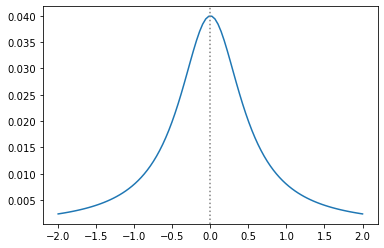

In [133]:
gamma = 1
eps_0 = 0.1
a = destroy(5)
c = np.sqrt(gamma) * a
delta = np.linspace(-2*gamma,2*gamma,100)

t0 = time.time()
n_ss = []
for d in delta:
    H = d * a.dag() * a + eps_0*(a+a.dag())
    rho_ss = steadystate(H, [c])
    n_ss.append(expect(a.dag()*a, rho_ss))
print("Calculation time: ", time.time()-t0, "seconds")

n_ss0 = np.array(n_ss)

plt.plot(delta, n_ss0)
plt.axvline(0,ls=":",c='grey')
plt.show()

## Kerr oscillator in weak-anharmonicity limit 

An advantage of the steady state solver is that we can also study nonlinear response (within the RWA). 

Calculation time:  0.19561290740966797 seconds


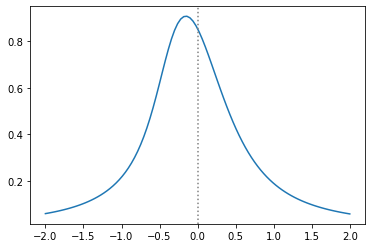

In [134]:
gamma = 1
eps_1 = 0.5
a = destroy(5)
K = 0.1
c = np.sqrt(gamma) * a
delta = np.linspace(-2*gamma,2*gamma,100)

t0 = time.time()
n_ss = []
for d in delta:
    H = d * a.dag() * a + eps_1*(a+a.dag()) + K*a.dag()*a.dag()*a*a
    rho_ss = steadystate(H, [c])
    n_ss.append(expect(a.dag()*a, rho_ss))
print("Calculation time: ", time.time()-t0, "seconds")

n_ss1 = np.array(n_ss)
plt.plot(delta, n_ss1)
plt.axvline(0,ls=":",c='grey')

Great, this makes sense, we see the "Kerr shift" / frequency shift we expect for a Duffing oscillator. 

## Kerr oscillator in strong-anharmonicity (transmon) limit 

Calculation time:  0.18938446044921875 seconds


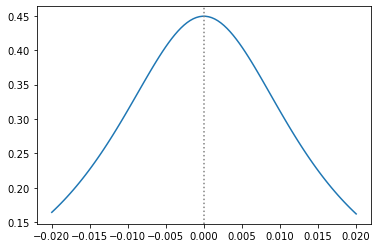

In [141]:
gamma = 0.01
eps_2 = 0.01
a = destroy(5)
K = 0.1
c = np.sqrt(gamma) * a
delta = np.linspace(-2*gamma,2*gamma,100)

t0 = time.time()
n_ss = []
for d in delta:
    H = d * a.dag() * a + eps_2*(a+a.dag()) + K*a.dag()*a.dag()*a*a
    rho_ss = steadystate(H, [c])
    n_ss.append(expect(a.dag()*a, rho_ss))
print("Calculation time: ", time.time()-t0, "seconds")

n_ss2 = np.array(n_ss)
plt.plot(delta, n_ss2)
plt.axvline(0,ls=":",c='grey')

And indeed, this one does *not* show a frequency shift but instead only frequency broadening, which is what one expects for the TLS limit with strong driving: the Kerr nature becomes invisible, and there is also no signature of the sign of the Kerr coefficient. 

## In between: Quantum nonlinear damping dynamical response

We can also try driving the "classical" Kerr oscillator stronger. What will become evident is that in this limit of very weak driving (single-photon regime), we also will see broadening of the Kerr oscillator, which is linked to our recent work on apparent nonlinear friction in weakly anharmonic oscillators (see https://arxiv.org/abs/2104.06464).

Calculation time:  0.22817516326904297 seconds


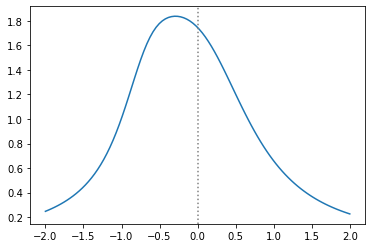

In [142]:
gamma = 1
eps_1 = 1
a = destroy(5)
K = 0.1
c = np.sqrt(gamma) * a
delta = np.linspace(-2*gamma,2*gamma,100)

t0 = time.time()
n_ss = []
for d in delta:
    H = d * a.dag() * a + eps_1*(a+a.dag()) + K*a.dag()*a.dag()*a*a
    rho_ss = steadystate(H, [c])
    n_ss.append(expect(a.dag()*a, rho_ss))
print("Calculation time: ", time.time()-t0, "seconds")

n_ss1 = np.array(n_ss)
plt.plot(delta, n_ss1)
plt.axvline(0,ls=":",c='grey')